In [1]:
# Import tidyverse, tidymodels, psych
library(tidyverse)
library(tidymodels)
library(psych)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Warning message:
"package 'tibble' was built under R version 4.0.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'tidymodels' was built under R version 4.0.3"
-- Attaching packages -------------------------------------- tidymodels 0.1.2 --

v broom     0.7.8      v recipes   0.1.15
v dials     0.0.9      v rsample   0.0.8 
v infer     0.5.3      v tune      0.1.2 
v modeldata 0.1.0      v workflows 0.2.1 
v parsnip   0.1.4      v yardstick 0.0.7 

Warning message:
"package 'broom' was built under R version 4.0.5"
Warning message:
"package 'dials' was built u

In [2]:
# Import birthweights
birthweights <- read_csv('../datasets/birthweights.csv')
head(birthweights)

Parsed with column specification:
cols(
  ID = col_double(),
  weight = col_double(),
  length = col_double(),
  headcirc = col_double(),
  gestation = col_double(),
  smoker = col_double()
)



ID,weight,length,headcirc,gestation,smoker
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1360,4.55,56,34,44,0
1016,4.32,53,36,40,0
462,4.10,58,39,41,0
1187,4.07,53,38,44,0
553,3.94,54,37,42,0
1636,3.93,51,38,38,0


`geom_smooth()` using formula 'y ~ x'



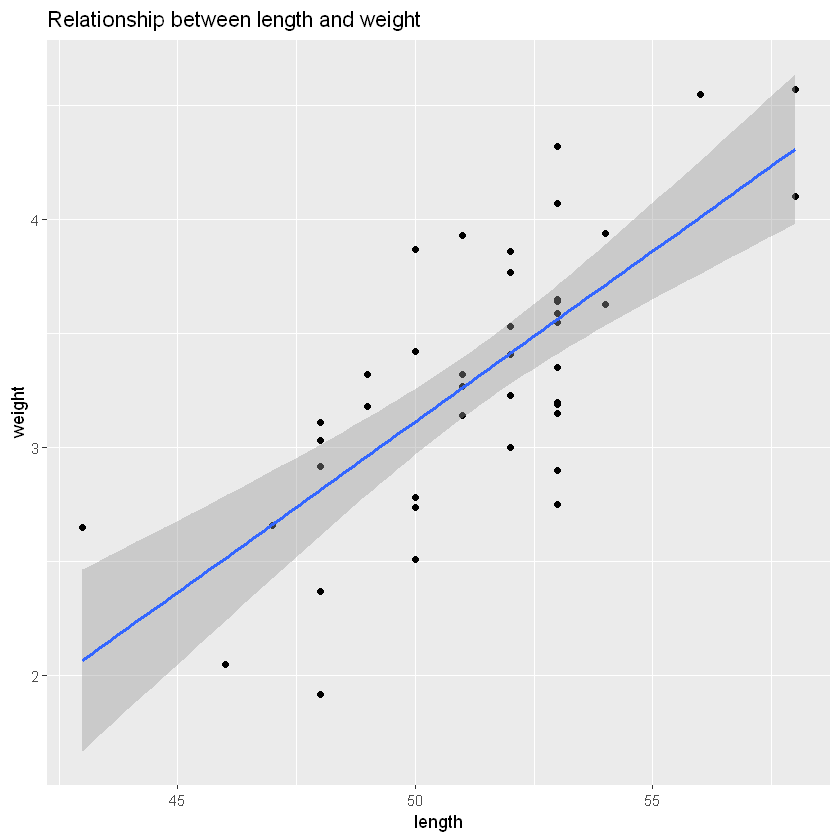

In [3]:
# Plot the relationship between length and weight
# Add a fit line and a title
ggplot(aes(x = length, y = weight), data = birthweights) + 
 geom_point() + 
 geom_smooth(method = lm) +
 ggtitle('Relationship between length and weight')

In [4]:
# Regress weight on length and get summary results

bw_reg <- lm(weight ~ length, data = birthweights)
summary(bw_reg)


Call:
lm(formula = weight ~ length, data = birthweights)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89446 -0.35492  0.01746  0.28674  0.75794 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.36244    1.14858  -3.798 0.000486 ***
length       0.14952    0.02234   6.693 5.03e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4199 on 40 degrees of freedom
Multiple R-squared:  0.5283,	Adjusted R-squared:  0.5165 
F-statistic:  44.8 on 1 and 40 DF,  p-value: 5.029e-08


In [5]:
# Split the dataset into train/test samples...
# what should be your next step?

set.seed(1234)


bw_split <- initial_split(birthweights)

bw_train <- training(bw_split)
dim(bw_train)

[1] 32  6

In [6]:
bw_test <- testing(bw_split)
dim(bw_test)

[1] 10  6